In [1]:
import numpy as np
import jittor as jt
from jittor.dataset import VarDataset, DataLoader

np.random.seed(0)

num_samples = 5000
a = np.float32(np.random.uniform(-1, 1, size=num_samples))
b = np.float32(np.random.uniform(-1, 1, size=num_samples))

data = np.concatenate((a[:,np.newaxis],b[:,np.newaxis]), axis=1)
labels = a * b


train_size = 4000
train_data = data[:train_size]
train_labels = labels[:train_size]

test_data = data[train_size:]
test_labels = labels[train_size:]

batch_size = 100
train_data_var = jt.array(train_data)
train_labels_var = jt.array(train_labels)
train_dataset = VarDataset(train_data_var, train_labels_var)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)

test_data_var = jt.array(test_data)
test_labels_var = jt.array(test_labels)
test_dataset = VarDataset(test_data_var, test_labels_var)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


In [43]:
from jittor import nn, Module

jt.flags.use_cuda = 1

class Model(Module):
    def __init__(self):
        super(Model, self).__init__()
       
        self.fc1 = nn.Linear(2, 10)
        self.activate = nn.Tanh()
        self.fc2 = nn.Linear(10, 1)
    
    def execute(self, x) :
        
        x = self.fc1(x)
        x = self.activate(x)
        x = self.fc2(x)
        return x

model = Model()

loss_function = nn.MSELoss()


learning_rate = 0.001

optimizer = nn.SGD(model.parameters(), learning_rate)#, momentum, weight_decay)


def train(model, train_loader, loss_function, optimizer, epoch):
    model.train()
    train_losses = list()

    for batch_index, (inputs, targets) in enumerate(train_loader):

        outputs = model(inputs)

        loss = loss_function(outputs, targets)
        optimizer.step(loss)

        train_losses.append(loss)

        if batch_index % 500 == 0:   
            print(f"Train epoch {epoch+1}, batch {batch_index}\tLoss: ", "%.5f" % loss)
    
    return train_losses

def test(model, val_loader, epoch, tol):
    model.eval()
    total_correct = 0
    total_samples = 0
    for batch_index, (inputs, targets) in enumerate(val_loader):
        outputs = model(inputs)
        # outputs = outputs.squeeze()
        targets = targets.unsqueeze(dim=1)
        correct_mask = jt.abs(outputs - targets) < tol
     
        correct = jt.sum(correct_mask)
        
        batch_size = inputs.shape[0]
        
        total_correct += correct
        total_samples += batch_size

 
        
    test_acc = total_correct / total_samples
    print (f'Epoch {epoch+1}\tTest acc is {test_acc}\n')              
    return test_acc

tol = 0.1
epochs = 50
train_losses = []
test_acc = []
for epoch in range(epochs):
    loss = train(model, train_loader, loss_function, optimizer, epoch)
    
    train_losses += loss
    
    acc = test(model, test_loader, epoch, tol)
    test_acc.append(acc)

Train epoch 1, batch 0	Loss:  0.20397
Epoch 1	Test acc is 0.14500001072883606

Train epoch 2, batch 0	Loss:  0.17043
Epoch 2	Test acc is 0.18000000715255737

Train epoch 3, batch 0	Loss:  0.14769
Epoch 3	Test acc is 0.19300000369548798

Train epoch 4, batch 0	Loss:  0.13222
Epoch 4	Test acc is 0.21000000834465027

Train epoch 5, batch 0	Loss:  0.12152
Epoch 5	Test acc is 0.23400001227855682

Train epoch 6, batch 0	Loss:  0.11405
Epoch 6	Test acc is 0.27400001883506775

Train epoch 7, batch 0	Loss:  0.10879
Epoch 7	Test acc is 0.2990000247955322

Train epoch 8, batch 0	Loss:  0.10499
Epoch 8	Test acc is 0.3110000193119049

Train epoch 9, batch 0	Loss:  0.10215
Epoch 9	Test acc is 0.320000022649765

Train epoch 10, batch 0	Loss:  0.10001
Epoch 10	Test acc is 0.3230000138282776

Train epoch 11, batch 0	Loss:  0.09834
Epoch 11	Test acc is 0.3320000171661377

Train epoch 12, batch 0	Loss:  0.09702
Epoch 12	Test acc is 0.3330000042915344

Train epoch 13, batch 0	Loss:  0.09592
Epoch 13	Test 

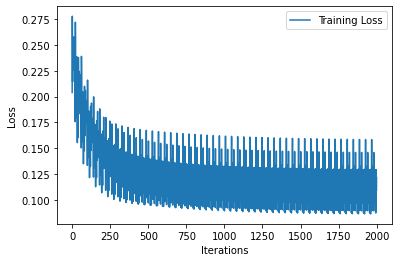

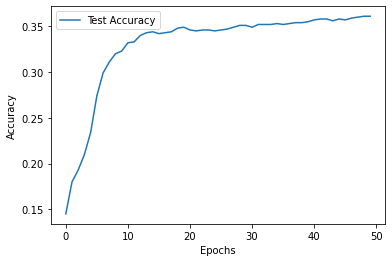

In [44]:
import matplotlib.pyplot as plt

plt.plot(train_losses, label="Training Loss")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.legend()
plt.savefig(f"tanh_tol{tol}_lr{learning_rate}_loss.jpg", dpi=800)
plt.show()

plt.plot(test_acc, label="Test Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.savefig(f"tanh_tol{tol}_lr{learning_rate}_acc.jpg", dpi=800)
plt.show()
